# Scientific readability project
## Difficulty of Reading Level of
### of Academic and Popular and Psuedo scientific Language

authors: other_authors, ...,  Russell Jarvis

https://github.com/russelljjarvis/

rjjarvis@asu.edu


In [1]:
LOAD_CACHED = False

In [2]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show
%matplotlib inline
from bokeh.plotting import show, output_notebook
from bokeh.models import ColumnDataSource, OpenURL, TapTool
import os
output_notebook()
os.system('jupyter trust Visualisation_search_terms_reading_levelGS.ipynb')



You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Loading BokehJS ...

0

In [3]:
import pickle
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

if LOAD_CACHED:
    with open('unraveled_links.p','rb') as handle:
        unravel = pickle.load(handle)
else:
    
    import dask.bag as db
    grid = {}
    from t_analysis_csv import web_iter
    from utils_and_paramaters import map_wrapper
    import utils_and_paramaters
    QUERY_LIST , _, _ = utils_and_paramaters.search_params()      
    ENGINE_LIST = utils_and_paramaters.engine_dict_list()
    list_per_links = web_iter(frames = False)
    data_frames = web_iter(frames = True)


/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


2733


# Wrangle unwieldly dict of dicts and coerce into Pandas Data Frame
For a statistics and plotting friendly data base like type.


In [7]:
unravel = url_text = crude_text = list_per_links
crude_text = list(filter(lambda x: len(x)!=0, crude_text))
import pandas as pd
ct = pd.DataFrame(crude_text,columns=list_per_links[0].keys())

2733
2733


In [8]:
list(ct.columns.values)
df2 = ct.loc[ct['keyword'] == 'unicorn', ['fkg']]
ct = ct.drop(ct[ct.fkg > 100].index)
df2 = ct.loc[ct['keyword'] == 'unicorn', ['fkg']]

In [9]:
print(QUERY_LIST)
links = [ f['link'] for f in unravel ]

['autosomes', 'respiration', 'bacteriophage', 'Neutron', 'Vaccine', 'Transgenic', 'GMO', 'Genetically Modified Organism', 'neuromorphic hardware']


In [11]:
print(data_frames.columns)
df = data_frames.T

Index(['WperS', 'cliau', 'dcr', 'dw', 'eofh', 'fAll', 'fM', 'file_path', 'fkg',
       'fre', 'frequencies', 'frexMost', 'gf', 'info_density', 'keyword',
       'link', 'link_rank', 'lwf', 'ri', 'se', 'sentSyl', 'sentcount', 'smog',
       'sp', 'ss', 'standard', 'stfreq', 'trimi', 'uniqueness', 'vslink',
       'wcount'],
      dtype='object')


In [12]:
source = ColumnDataSource(data=dict(
    y=[f['fkg'] for f in unravel],
    x=[ f['sp'] for f in unravel ],
    desc=[ f['link'] for f in unravel ],
))

hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
])



p = figure(plot_width=1000, plot_height=1000, tools=["tap","hover"],
           title="For Against versus complexity")


p.circle('x', 'y', size=8, source=source)


url = "@desc"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

In [39]:

source = ColumnDataSource(data=dict(
    x=[ f['fkg'] for f in unravel if 'fkg' in f.keys() ],
    y=[ f['info_density'] for f in unravel if 'info_density' in f.keys()],
    links=links,
))


hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("links", "@links"),
])



p = figure(plot_width=1000, plot_height=1000, tools=["tap","hover"],
           title="Conciseness versus Complexity")


p.circle('x', 'y', size=8, source=source)


url = "@links"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

206 206
186 186
220 220
173 173
357 357
211 211
362 362
188 188
203 203


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


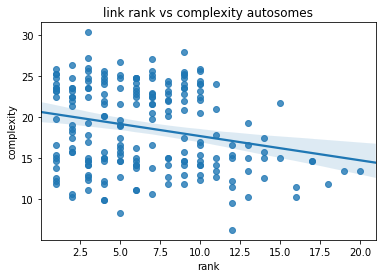

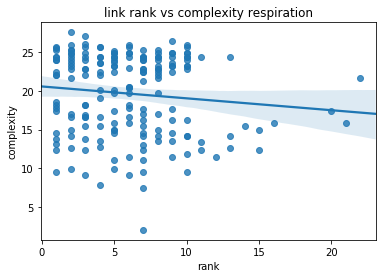

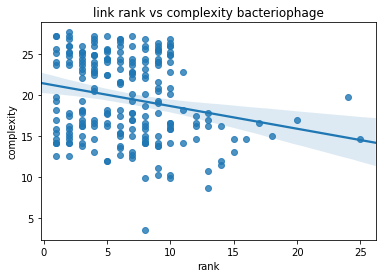

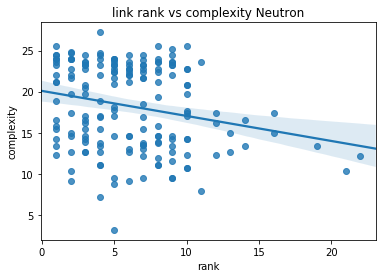

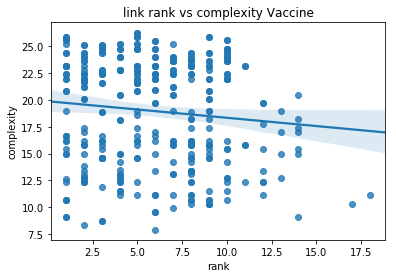

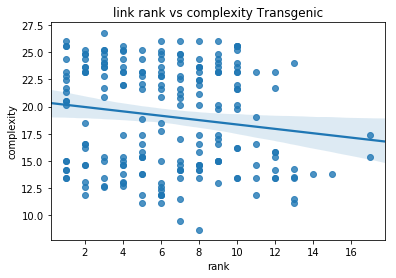

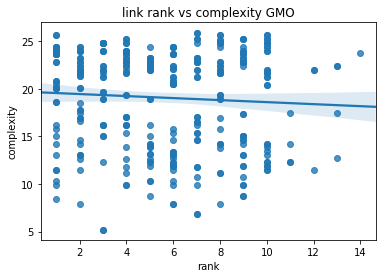

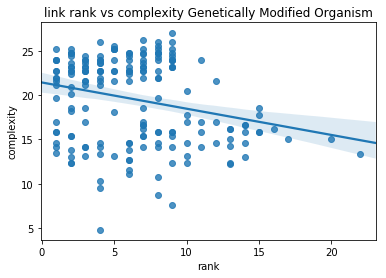

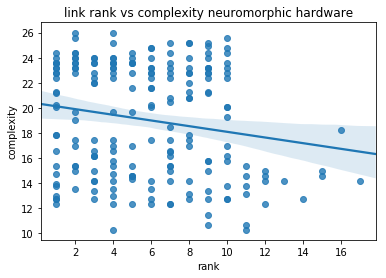

In [40]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
unravel = list(filter(lambda x: len(x)!=0, unravel))
for outer,search_query in enumerate(QUERY_LIST):    
    complexity = ct.loc[ct['keyword'] == search_query, ['fkg']]
    complexity = complexity['fkg'].values

    
    rank = [ f['link_rank'] for f in unravel if f['keyword'] == search_query ]#and f['urlDat']['se'] == v ]
    print(len(complexity),len(rank))
    if len(complexity)>0 and len(rank)>0:
        if len(complexity)==len(rank):
            plt.figure()


            df = pd.DataFrame({'complexity': complexity,'rank': rank})
            plt.title(str('link rank vs complexity ')+str(search_query))
            ax = sns.regplot(x="rank",y="complexity", data=df)

legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()       

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


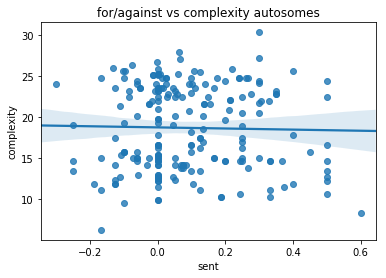

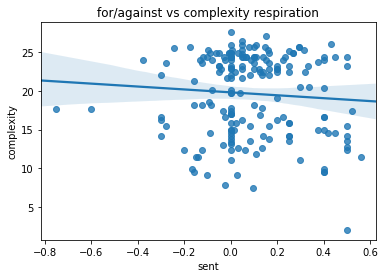

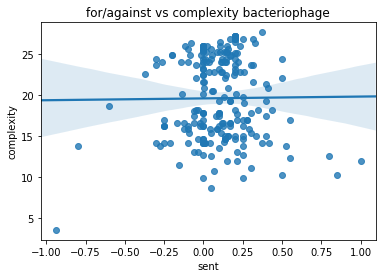

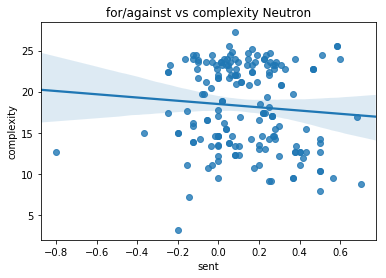

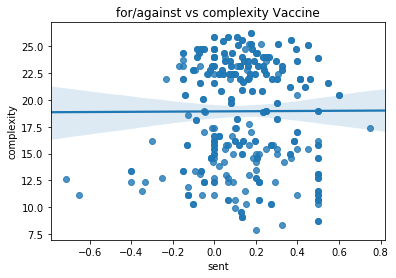

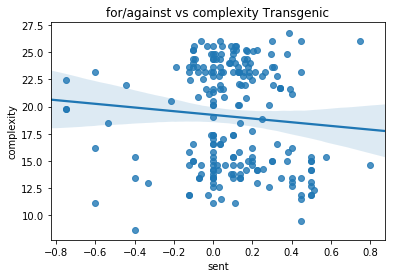

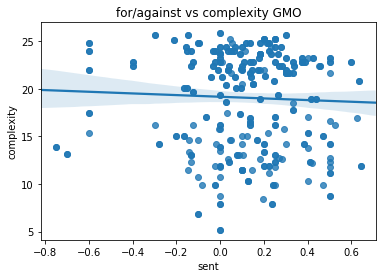

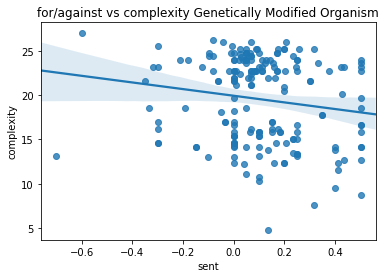

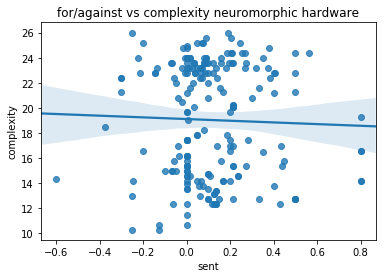

In [41]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

import numpy as np
import pandas as pd


for outer,search_query in enumerate(QUERY_LIST):    
    complexity = [ f['fkg'] for f in unravel if f['keyword'] == search_query ]
    #complexity = ctu.loc[ctu['keyword'] == search_query, ['fkg']]
    #complexity = complexity['fkg'].values
    sent = [ f['sp'] for f in unravel if f['keyword'] == search_query ]
    if len(complexity)>0 and len(sent)>0:
        if len(complexity)==len(sent):


            df = pd.DataFrame({'complexity': complexity,'sent': sent})
            plt.figure()
            plt.title(str('for/against vs complexity ')+str(search_query))
            ax = sns.regplot(x="sent",y="complexity", data=df)
legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


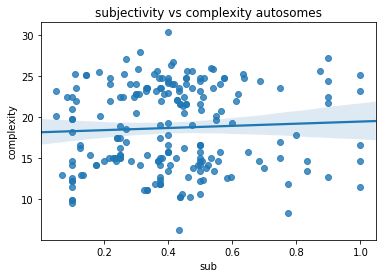

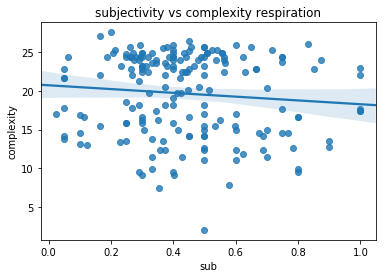

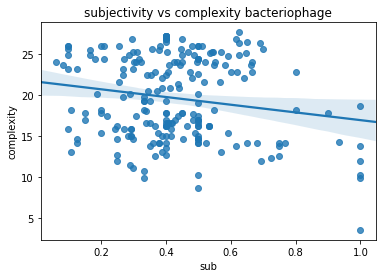

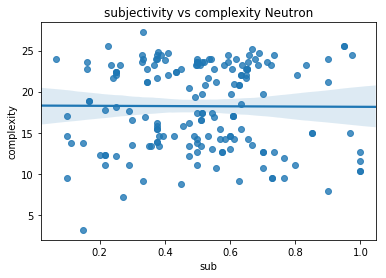

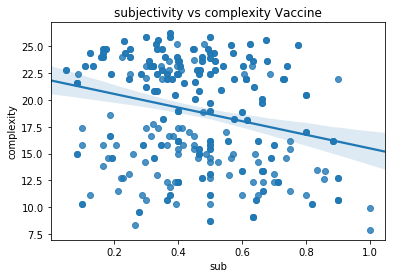

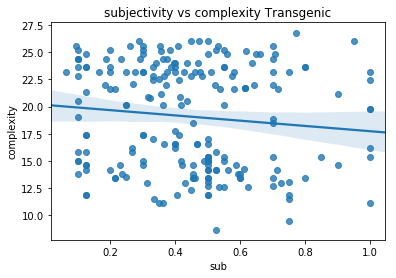

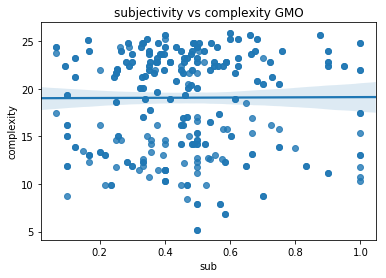

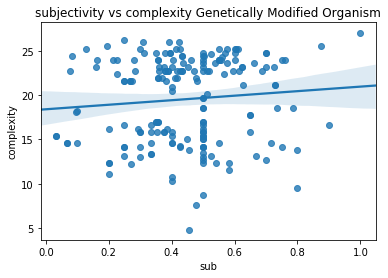

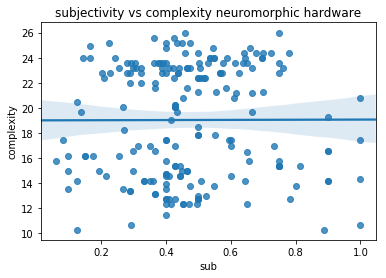

In [22]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
for outer,search_query in enumerate(QUERY_LIST):    
    complexity = [ f['fkg'] for f in unravel if f['keyword'] == search_query ]
    sub = [ f['ss'] for f in unravel if f['keyword'] == search_query ]
    if len(complexity)>0 and len(sent)>0:
        df = pd.DataFrame({'complexity': complexity,'sub': sub})
        plt.figure()
        plt.title(str('subjectivity vs complexity ')+str(search_query))
        ax = sns.regplot(x="sub",y="complexity", data=df)


legend = ax.legend(loc='upper center', shadow=True)
plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))
plt.show()

In [24]:

ENGINE_LIST = utils_and_paramaters.engine_dict_list()
crude_text = list(filter(lambda x: len(x)!=0, crude_text))

gsc_text = list(filter(lambda x: x['se'] == 'gScholar_', crude_text))
bibg_text = list(filter(lambda x: x['se'] == 'bing_', crude_text))

for q in ENGINE_LIST:
    check = list(filter(lambda x: x['se'] == q, crude_text))

for q in QUERY_LIST:
    check = list(filter(lambda x: x['keyword'] == q, crude_text))
    
# total number of words
ents = ct['eofh']


droplist = []
droplist.append(ct.loc[10])



In [25]:
urls = ct.values


# Unigram model expected value
Entropies of texts

In [29]:
#print(unravel)
freqs = [  u['frequencies'] for u in unravel ]
most_common = [ u['frexMost'] for u in unravel ]
#print(most_common)
freqs = [ (v,k) for f in freqs for k,v in f  ]
# create a dictionary of container keys with all values set to 0.
# Giant model is a federated model of histograms
giantmodel = { fs[0]:0 for fs in freqs }
# if fdict already has count data for that word/token add currently found count data to existing data.
for i in freqs:
    giantmodel[str(i[0])] = giantmodel[str(i[0])] + i[1]
wt = len(giantmodel)


'\ndef pmi(word1, word2, unigram_freq, bigram_freq):\n  prob_word1 = unigram_freq[word1] / float(sum(unigram_freq.values()))\n  prob_word2 = unigram_freq[word2] / float(sum(unigram_freq.values()))\n  prob_word1_word2 = bigram_freq[" ".join([word1, word2])] / float(sum(bigram_freq.values()))\n  return math.log(prob_word1_word2/float(prob_word1*prob_word2),2) \n  \n  \n\nfrom sklearn.metrics import mutual_info_score\n    #import pdb; pdb.set_trace()\ndef calc_MI(x, y, bins):\n    c_xy = np.histogram2d(x, y, bins)[0]\n    mi = mutual_info_score(None, None, contingency=c_xy)\n    return mi\ny = []\nx = []\nfor i,word in enumerate(URLtext):\n    x.append(fdist[word]/len(fdist))\n    if i<len(probs)-1:\n        y.append(fdist[URLtext[i+1]]/len(fdist))\nx = np.array(x)\ny = np.array(y)\nprint(x,y)        \nprint(calc_MI(x,y,len(x)))\n'

4.71313814075
0.261849838474


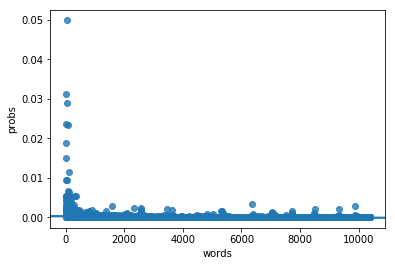

[NbConvertApp] WARNING | pattern 'Visualisation_search_terms_reading_levelGS0.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
  

In [45]:

gm = sum([ v for k,v in giantmodel.items() ])    
probs = [ (float(v)/gm, k) for k,v in giantmodel.items() ]
probs = [ (p[0],p[1]) for p in probs if p[0] > 0.]
ents = {}
ent = 0
import math
for p in probs:
    if p[0] > 0.:
        ent -= p[0] * math.log(p[0], 2)
        ents[p[1]] = ent

#federate_frequencies =  []
yentropies = [ v['eofh'] for v in unravel ]
import numpy as np
print(np.mean(yentropies))
print(np.var(yentropies))

wns = [ x for x in range(0,len(ents)) ]
probs = [i[0] for i in probs]
import pandas as pd
d = {'words': wns, 'probs': probs}
df = pd.DataFrame(data=d)
ax = sns.regplot(x='words', y='probs', data=df)
plt.show()



Below: call system (bash) to programmatically convert this notebook to html,
Such that tech illiterate people can view it in a browser (probably ipynb extension is essentially html anyway, but 
they probably don't realize this).

In [ ]:
!jupyter nbconvert Visualisation_search_terms_reading_levelGS0.ipynb --to html 



In [46]:
import os
os.system('jupyter nbconvert Visualisation_search_terms_reading_levelGS0.ipynb --to html ')
!pwd

/home/jovyan/wcproject/GoogleScraper


In [31]:
stat_items = [ f for f in unravel ] 

unravel[0];
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
import numpy as np

rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

features = [ list(c.values())[0:-1] for c in crude_text ]
feature_labels = [ list(c.keys())[0:-1] for c in crude_text ]

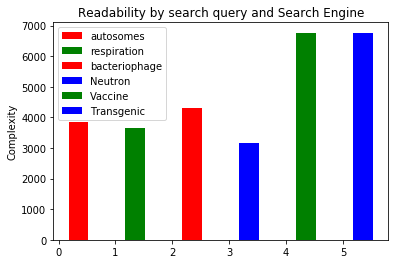

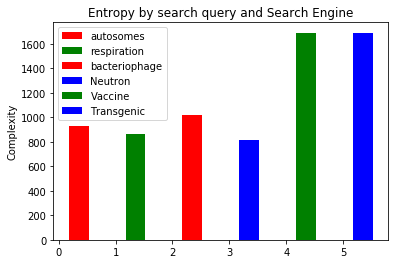

In [32]:
# 3.       GMO/transgenics vs. text complexity
y = []
e = []
for outer,sq in enumerate(QUERY_LIST):    

    comp = sum([ f['fkg'] for f in unravel if f['keyword'] ==sq])
    entropy = sum([ f['eofh'] for f in unravel if f['keyword'] ==sq  ])
    y.append(comp)
    e.append(entropy)
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(QUERY_LIST)]
offset = [(i+width) for i,v in enumerate(ind)]
rects1 = ax.bar(offset[0], y[0] , width, color='r')# yerr=men_std)
rects2 = ax.bar(offset[1], y[1], width, color='g')#, yerr=women_std)
rects3 = ax.bar(offset[2], y[2], width, color='r')#, yerr=women_std)
rects4 = ax.bar(offset[3], y[3], width, color='b')#, yerr=women_std)
rects5 = ax.bar(offset[4], y[4], width, color='g')#, yerr=women_std)
rects6 = ax.bar(offset[5], y[4], width, color='b')#, yerr=women_std)




# add some text for labels, title and axes ticks
ax.set_ylabel('Complexity')
ax.set_title('Readability by search query and Search Engine')

ax.legend([rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]], QUERY_LIST)
plt.show()
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
rects1 = ax.bar(offset[0], e[0] , width, color='r')# yerr=men_std)
rects2 = ax.bar(offset[1], e[1], width, color='g')#, yerr=women_std)
rects3 = ax.bar(offset[2], e[2], width, color='r')#, yerr=women_std)
rects4 = ax.bar(offset[3], e[3], width, color='b')#, yerr=women_std)
rects5 = ax.bar(offset[4], e[4], width, color='g')#, yerr=women_std)
rects6 = ax.bar(offset[5], e[4], width, color='b')#, yerr=women_std)


ax.set_ylabel('Complexity')
ax.set_title('Entropy by search query and Search Engine')
ax.legend([rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]], QUERY_LIST)


plt.show()

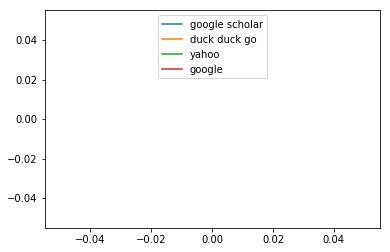

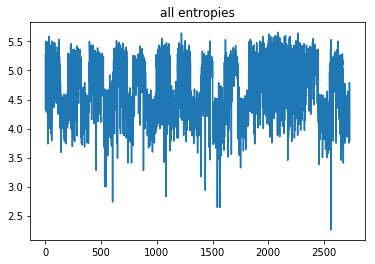

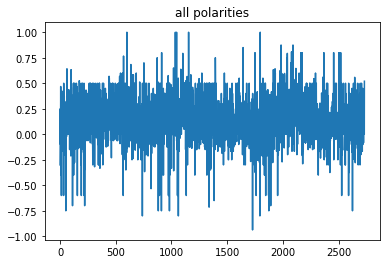

2733
(2733,)


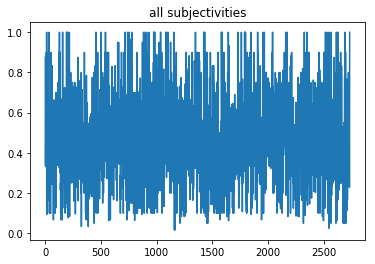

In [33]:

gsc_text = list(filter(lambda x: x['se'] == 'gScholar_', crude_text))
ddg_text = list(filter(lambda x: x['se'] == 'duckduckgo_', crude_text))
bing_text = list(filter(lambda x: x['se'] == 'bing_', crude_text))
gword_names = [ c['keyword'] for c in gsc_text ]
gsc_entropies = [e['eofh'] for e in gsc_text if e['se'] == 'gScholar_' ]
bing_entropies = [e['eofh'] for e in bing_text if e['se'] == 'bing_']
ddg_entropies = [e['eofh'] for e in ddg_text if e['se'] == 'duckduckgo_'] 
yahoo_entropies = [e['eofh'] for e in ddg_text if e['se'] == 'yahoo_'] 
google_entropies = [e['eofh'] for e in ddg_text if e['se'] == 'google_'] 

wns = [ x for x in range(0,len(gsc_text)) ]
plt.clf()
fig, ax = plt.subplots()

plt.plot([ x for x in range(0,len(gsc_entropies)) ],gsc_entropies,label='google scholar')
plt.plot([ x for x in range(0,len(ddg_entropies)) ],ddg_entropies,label='duck duck go')
plt.plot([ x for x in range(0,len(yahoo_entropies)) ],yahoo_entropies,label='yahoo')
plt.plot([ x for x in range(0,len(google_entropies)) ],google_entropies,label='google')
legend = ax.legend(loc='upper center')

plt.show()

all_entropies = [e['eofh'] for e in crude_text ] 
all_entropies = [e['eofh'] for e in crude_text ] 
plt.clf()
plt.plot([i for i,j in enumerate(all_entropies)],all_entropies)
plt.title('all entropies')
plt.show()
all_polarities =[e['sp'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_polarities)],all_polarities)
plt.title('all polarities')
plt.show()
print(len(unravel))
print(np.shape(unravel))


all_subjectivities =[e['ss'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_subjectivities)],all_subjectivities)
plt.title('all subjectivities')
plt.show()


Is entropy a good predictor of all other variables?
